In [956]:
import pandas as pd
import re
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [957]:
import warnings # for ignore unimportant warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [958]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [959]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [960]:
train.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


| Column     | Description                                                                                                              |
|------------|--------------------------------------------------------------------------------------------------------------------------|
| `survival` | Survival: <br><ul><li>`0`: no</li><li>`1`: yes</li></ul>                                                                 |
| `pclass`   | Ticket class: <br> <ul><li>`1`: 1st</li><li>`2`: 2nd</li><li>`3`: 3rd</li></ul>                              |
| `sex`      | sex                                                              |
| `age`      | Age in years       |
| `sibsp`    | # of siblings / spouses aboard the Titanic                                       |
| `parch`    | # of parents / children aboard the Titanic     |
| `ticket`   | Ticket number                                                                             |
| `fare`     | Passenger fare |
| `cabin`    | Cabin number                                      |
| `embarked` | Port of Embarkation: <br><ul><li>`C`: Cherbourg</li><li>`Q`: Queenstown</li><li>`S`: Southampton</li></ul>                                     |



**Variable Notes:** <br>
`pclass`: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower <br>

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 <br>

`sibsp`: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored) <br>

`parch`: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [961]:
train.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [962]:
test.isnull().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [963]:
train.duplicated().sum()

0

In [964]:
test.duplicated().sum()

0

Let's merge these two datasets to apply uniform preprocessing steps for both.

In [965]:
data = pd.concat([train, test])

In [966]:
data.reset_index(drop=True, inplace=True)

In [967]:
data.isnull().sum()

passengerid       0
survived        418
pclass            0
name              0
sex               0
age             263
sibsp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

In [968]:
pattern = r"\S+(?=\.)"

data['title'] = [re.findall(pattern, name)[0] for name in data['name']]

In [969]:
data['age'] = (
    data.groupby('title')['age'].apply(lambda group: group.fillna(group.median())).reset_index(level=0)['age']
)

In [970]:
thomas = data[data['fare'].isnull()]

In [971]:
thomas_fare = data.groupby(['sex', 'pclass', 'title'])['fare'].mean()[thomas.sex.values[0], thomas.pclass.values[0], thomas.title.values[0]]

In [972]:
data['fare'].fillna(thomas_fare, inplace=True)

In [973]:
data[data['embarked'].isnull()]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [974]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='embarked', ylabel='count'>

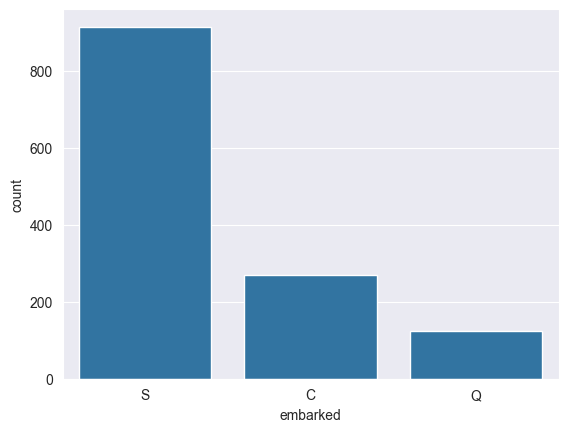

In [975]:
sns.countplot(data=data, x='embarked')

In [976]:
common_value = 'S'
data['embarked'].fillna(common_value, inplace=True)

In [977]:
data.isnull().sum()

passengerid       0
survived        418
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin          1014
embarked          0
title             0
dtype: int64

In [978]:
data['cabin'].value_counts()

cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [979]:
data['cabin'] = data['cabin'].str[:1]

<Axes: xlabel='cabin', ylabel='count'>

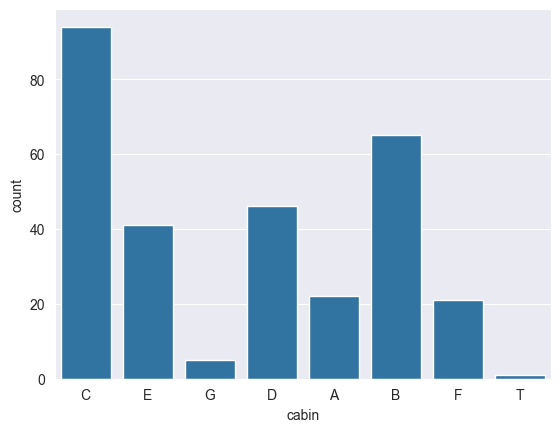

In [980]:
sns.countplot(data=data, x='cabin')

<Axes: xlabel='cabin', ylabel='Count'>

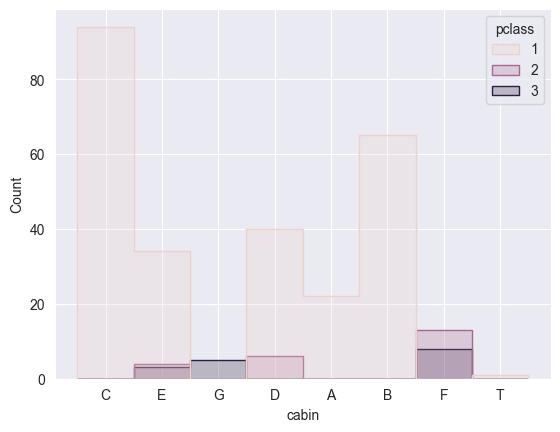

In [981]:
sns.histplot(data=data, x="cabin",hue="pclass", element="step")

In [982]:
data[data['cabin'] == 'T']

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
339,340,0.0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,Mr


In [983]:
data['cabin'].replace('T', 'C', inplace=True)

In [984]:
df2 = data.groupby(['cabin', 'pclass']).size().reset_index(name='cabin_count')
a = df2.groupby('pclass')['cabin_count'].transform('sum')
df2['cabin_count'] = df2['cabin_count'].div(a)

df2

,cabin,pclass,cabin_count
0,A,1,0.085938
1,B,1,0.253906
2,C,1,0.371094
3,D,1,0.156250
4,D,2,0.260870
5,E,1,0.132812
6,E,2,0.173913
7,E,3,0.187500
8,F,2,0.565217
9,F,3,0.500000


In [985]:
cabin_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6}
data['cabin'] = data['cabin'].map(cabin_mapping)

In [986]:
data['cabin'].fillna(data.groupby('pclass')['cabin'].transform('median'), inplace=True)

//

In [987]:
data['family_size'] = data['parch'] + data['sibsp'] + 1

In [988]:
data[["family_size", "survived"]].groupby(['family_size']).mean().sort_values(by='survived', ascending=False)

,survived
family_size,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [989]:
family_mapping = {
    1: 2, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 3, 11: 3
}

data['family_size'] = data['family_size'].map(family_mapping)

In [990]:
data.drop(['name', 'title', 'passengerid', 'ticket'],axis=1,inplace=True)

In [1003]:
data = pd.get_dummies(data, drop_first=True)

(1309, 11)

In [992]:
scale = MinMaxScaler()

col = data.columns
data_scaled = scale.fit_transform(data)

data_scaled= pd.DataFrame(data_scaled, columns=col)

In [993]:
train_scaled = data_scaled.loc[data_scaled["survived"].notnull(),:]
test_scaled = data_scaled.loc[data_scaled["survived"].isnull(),:]

In [994]:
y_train_scaled = train_scaled["survived"]

In [995]:
X_train_scaled = train_scaled.drop("survived",axis=1)

In [996]:
X_test_scaled = test_scaled.drop("survived",axis=1)

In [997]:
passenger_ids = test['passengerid']

In [998]:
from sklearn.tree import DecisionTreeClassifier

random_state = 12345

decision_tree_model = None
decision_tree_result = 0
decision_tree_depth = 1

for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state=random_state, max_depth=depth)
    model.fit(X_train_scaled, y_train_scaled)
    result = model.score(X_train_scaled, y_train_scaled)
    if result > decision_tree_result:
        decision_tree_model = model
        decision_tree_depth = depth
        decision_tree_result = result

print(f'The best ccuracy: {decision_tree_result:.4}. ',
      f'The best depth: {decision_tree_depth}', sep='\n')

The best ccuracy: 0.9181. 
The best depth: 9


In [1002]:
from sklearn.ensemble import RandomForestClassifier

forest_model = None
forest_result = 0
forest_est = 1
forest_depth = 1

for est in range(1, 40):
    for depth in range(1, 11):
        model = RandomForestClassifier(random_state=random_state, n_estimators=est, max_depth=depth)
        model.fit(X_train_scaled, y_train_scaled)
        result = model.score(X_train_scaled, y_train_scaled)
        if result > forest_result:
            forest_model = model
            forest_result = result
            forest_est = est
            forest_depth = depth

print(f'Accuracy: {forest_result:.4}',
      f'Forest_est: {forest_est}',
      f'Forest_depth: {forest_depth}', sep='\n')

Accuracy: 0.9798
Forest_est: 43
Forest_depth: 18


In [1000]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=random_state)
logistic_regression_model.fit(X_train_scaled, y_train_scaled)
logistic_regression_result = logistic_regression_model.score(X_train_scaled, y_train_scaled)

print(f'Accuracy: {logistic_regression_result:.4}')

Accuracy: 0.8103


In [1001]:
models = [
    {
        'model': decision_tree_model,
        'name': 'decision_tree'
    },
    {
        'model': forest_model,
        'name': 'random_forest'
    },
    {
        'model': logistic_regression_model,
        'name': 'logistic_regression'
    },
]


for model_obj in models:
    y_pred = model_obj['model'].predict(X_test_scaled)
    submission = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': y_pred.astype(int)})
    submission.to_csv(f'submission_{model_obj["name"]}.csv', index=False)

<img src="results.png" alt="results" />